In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

ModuleNotFoundError: No module named 'shap'

In [4]:
!pip install shap

     ------------------------------------- 435.6/435.6 kB 40.0 kB/s eta 0:00:00


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data() # Loading the hand-written digits Dataset from the Keras library

11490434/11490434 [==============================] - 7s 1us/step


In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
x_train[0].shape

(28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

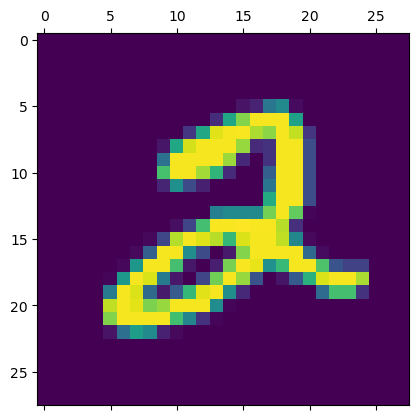

In [17]:
# to visualize a particular number in the Dataset we can use matplotlibs matshow and visualize the particular number from the
#x-Train dataset
plt.matshow(x_train[5])

In [30]:
y_train[2]

4

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
x_train.shape # we want to reshape this into (60000, 784)

(60000, 28, 28)

In [33]:
x_test.shape

(10000, 28, 28)

In [46]:
x_train = x_train / 255
x_test = x_test / 255

In [47]:
# now we will have to flatten the 28 x 28 matrix into a single dimensional array like 1 column and 784 rows
# for that we will be using the pandas function reshape and input the required shape
x_train_flat = x_train.reshape(len(x_train),28*28) # length of the x_train is 60000 and the no. of rows is 784 so we have changed the shape from 28 X 28 to 784 x 1

In [48]:
x_train_flat.shape

(60000, 784)

In [49]:
# similarly we have to reshape the test dataset as well
x_test_flat = x_test.reshape(len(x_test),28*28)

In [50]:
x_test_flat.shape

(10000, 784)

In [51]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [52]:
# Now we will create the simple nueral network
# It is a perceptron ,i.e., a single input layer with 784 layers and an output layer that has 10 elements

In [53]:
# Here we will be using the Sequential NN in Keras
# optimizer means the algo to get to the local minima and here the loss sparse_categorical_crossentropy is used.
# categorical means that our output variable y_train is an integer and sparse because if the array was hot encoded then we would have used only
# categorical_crossentropy
# the metrics that we will be computing is accuracy of the NN built and so it the metrics 'accuracy' is added

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
model.fit(x_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 796us/step - loss: 0.4684 - accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.2733 - accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2669 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.2620 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2584 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.2562 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.2526 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 2s 810u

In [54]:
# The accuracy is not very good, so to make the model more accurate the epochs could be increased but that would take a lot of epochs
# to make the accuracy higher, we can make the data scaled
# This is done to get all the values scaled and that can be done in this case by dividing all the values in the 
# x_train and x_test datasets by 255 since that is the maximum value 
# now we can see that the accuracy has increased and the accuracy is a lot better

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Now we have to evaluate the accuracy of the model on the test dataset:

model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 810us/step - loss: 0.2652 - accuracy: 0.9257


[0.26524171233177185, 0.9257000088691711]

In [57]:
# Seems to have a pretty decent accuracy as well

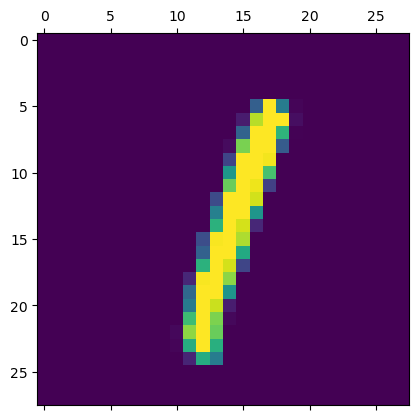

In [68]:
plt.matshow(x_test[5])

In [66]:
y_predict = model.predict(x_test_flat)
y_predict[1]

313/313 [==============================] - 0s 526us/step


array([3.58871222e-01, 6.32754900e-03, 9.99696970e-01, 1.24268331e-01,
       1.77198724e-11, 8.85571539e-01, 9.38440561e-01, 3.08497912e-15,
       1.01153076e-01, 5.12645482e-12], dtype=float32)

In [69]:
# We will print this values using the argmax func in numpy this prints the index of the maximum value in the array
np.argmax(y_predict[5]) 

1

In [71]:
# Now we will be making a confusion matrix between y_test and y_predicted to check the accuracy
# But y_predict are all real values and y_test are integers
# We will be doing this by actually calculating the argmax values/"labels" for each of the value in the y_predict
# This is called list comprehension
# We can create a new list form an existing list by using a for loop in it and storing the labels in a new variable, this we will 
# use for computing our confusion matrix
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5] # printing the first 5 values

[7, 2, 1, 0, 4]

In [72]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [73]:
# We can see that the values in the y_predict and the y_test matches

In [74]:
# CONFUSION MATRIX

In [78]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    8,    8,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   11,  908,   19,    8,    7,   12,   13,   45,    3],
       [   3,    0,   11,  918,    0,   34,    3,   12,   22,    7],
       [   1,    1,    5,    2,  914,    0,    9,    5,    9,   36],
       [   8,    2,    1,   23,    7,  797,   12,    7,   29,    6],
       [  10,    3,    7,    1,    7,   14,  912,    2,    2,    0],
       [   1,    8,   18,    5,    6,    1,    0,  953,    3,   33],
       [   5,   10,    5,   19,    9,   32,   10,   10,  864,   10],
       [  10,    8,    1,    8,   20,    8,    0,   27,    6,  921]])>

In [80]:
# Now we will be adding a hidden layer to our previous NN:

model = keras.Sequential([
    keras.layers.Dense(393, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
model.fit(x_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2105 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0852 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0550 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [81]:
# We can see that the accuracy has increased to more than 99%

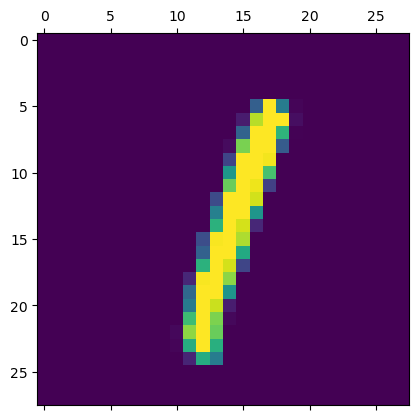

In [82]:
plt.matshow(x_test[5])

In [83]:
y_predict = model.predict(x_test_flat)
y_predict[1]

313/313 [==============================] - 0s 1ms/step


array([7.7629309e-08, 8.2335472e-01, 1.0000000e+00, 4.4335284e-05,
       1.8109500e-14, 1.2799131e-06, 2.4668903e-05, 1.8796247e-13,
       4.6517025e-06, 4.1049941e-12], dtype=float32)

In [84]:
# We will print this values using the argmax func in numpy this prints the index of the maximum value in the array
np.argmax(y_predict[5]) 

1

In [85]:
# Now we will be making a confusion matrix between y_test and y_predicted to check the accuracy
# But y_predict are all real values and y_test are integers
# We will be doing this by actually calculating the argmax values/"labels" for each of the value in the y_predict
# This is called list comprehension
# We can create a new list form an existing list by using a for loop in it and storing the labels in a new variable, this we will 
# use for computing our confusion matrix
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5] # printing the first 5 values

[7, 2, 1, 0, 4]

In [86]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [87]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    1,    1,    0,    1,    1,    1,    0],
       [   1, 1123,    3,    3,    1,    0,    2,    0,    2,    0],
       [   1,    0, 1010,    5,    6,    0,    0,    6,    4,    0],
       [   0,    0,    3,  993,    0,    4,    0,    1,    2,    7],
       [   1,    1,    4,    0,  972,    0,    1,    0,    0,    3],
       [   2,    0,    0,    9,    1,  870,    2,    0,    4,    4],
       [   1,    3,    0,    1,    8,    2,  943,    0,    0,    0],
       [   0,    3,    7,    2,    6,    0,    0,  999,    2,    9],
       [   1,    0,    1,    5,    3,    1,    4,    2,  951,    6],
       [   0,    2,    0,    2,   29,    4,    1,    3,    2,  966]])>

In [88]:
# You can see that the error have gone down a lot more in the cm

In [89]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9801


[0.08391229808330536, 0.9800999760627747]